In [1]:
#Affordability: income to cars purchased
#Gender: compare gender with transmission/ color
#compare gender with body style and income
#Compare compare with models/ transmission / price
#pattern in sales
#Region and salees

In [2]:
#import Libraries to be used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load dataset
df = pd.read_csv("/Users/kobynaebow/Desktop/Car_Sales_Analysis/Car-Sales-/Car Sales.xlsx - car_data.csv")

In [4]:
# Data Cleaning
df.info()

# find duplicate rows
duplicate_rows = df.duplicated().values.any()

#duplicate_rows = df.duplicated().sum()
duplicate_rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


False

In [5]:
# Check for null values in each column
df.isnull().sum()

# Identify rows with null values in a specific column
null_in_column = df['Customer Name'].isnull()
df[null_in_column]

# Handling null values: Filling with a random name 
car_sales_df = df.fillna(value={'Customer Name': 'Emmanuel Michaels'})

car_sales_df.loc[[7564]]

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
7564,C_CND_007565,11/5/2022,Emmanuel Michaels,Male,680000,Saab-Belle Dodge,Dodge,Ram Pickup,DoubleÂ Overhead Camshaft,Auto,Pale White,45000,60504-7114,Hardtop,7203103,Aurora


In [6]:
df['affordability_ratio'] = car_sales_df['Annual Income'] / car_sales_df['Price ($)']

In [7]:
# Define a function to categorize affordability
def categorize_affordability(ratio):
    if ratio >= 1:
        return 'Affordable'
    elif 0.5 <= ratio < 1:
        return 'Expensive'
    else:
        return 'Luxury'

# Apply the function to create a new column for affordability category
df['affordability_category'] = df['affordability_ratio'].apply(categorize_affordability)

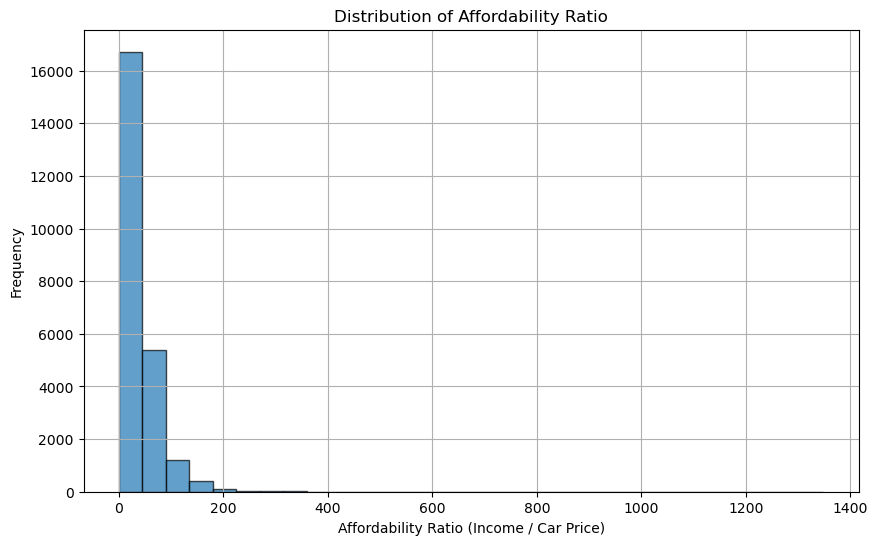

In [8]:
# Plot the distribution of the affordability ratio
plt.figure(figsize=(10, 6))
plt.hist(df['affordability_ratio'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Affordability Ratio')
plt.xlabel('Affordability Ratio (Income / Car Price)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [9]:
# Remove leading/trailing spaces from column names
car_sales_df.columns = car_sales_df.columns.str.strip()

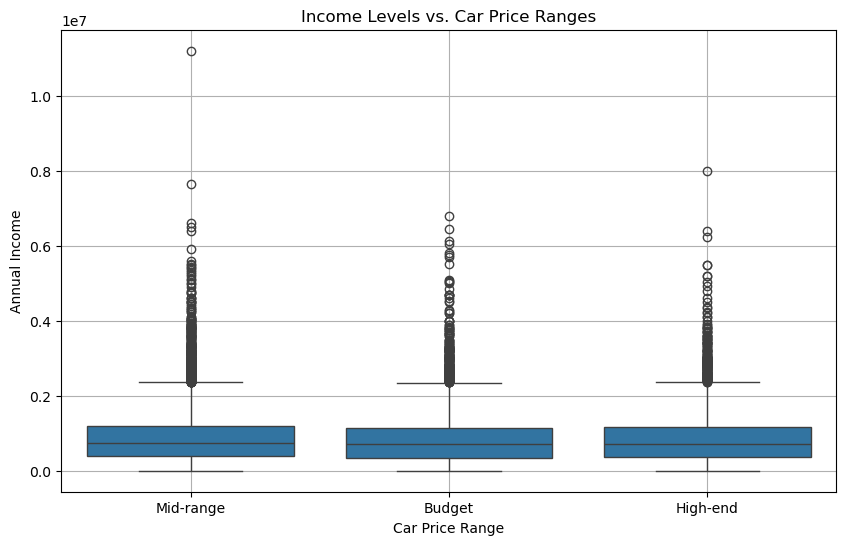

In [10]:
# Create a new column for price range categories
def categorize_price(price):
    if price < 20000:
        return 'Budget'
    elif 20000 <= price < 40000:
        return 'Mid-range'
    else:
        return 'High-end'

car_sales_df['price_range'] = car_sales_df['Price ($)'].apply(categorize_price)

# Plot the relationship between income levels and car price ranges
plt.figure(figsize=(10, 6))
sns.boxplot(x='price_range', y='Annual Income', data=car_sales_df)
plt.title('Income Levels vs. Car Price Ranges')
plt.xlabel('Car Price Range')
plt.ylabel('Annual Income')
plt.grid(True)
plt.show()